In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

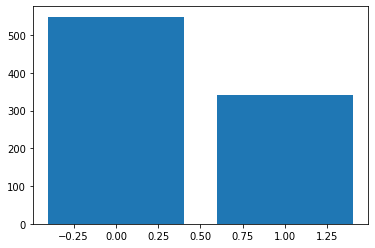

In [6]:
plt.bar(list(train['Survived'].value_counts().keys()),list(train['Survived'].value_counts()))
#here we are getting -0.25 and 0.25 around 0 since it isnt treating it as categorical variable 
#similarly for 1 we are getting 0.75 and 1.25

In [7]:
train['Pclass'].value_counts()
#Count of passengers in 1st,2nd and 3rd class

3    491
1    216
2    184
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

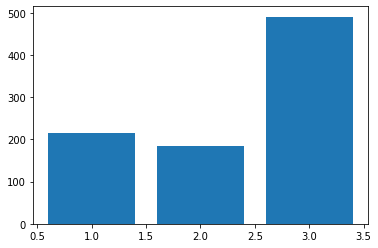

In [8]:
plt.bar(list(train['Pclass'].value_counts().keys()),list(train['Pclass'].value_counts()))

In [9]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

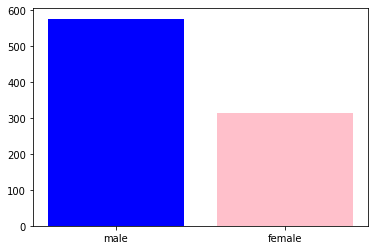

In [10]:
plt.bar(list(train['Sex'].value_counts().keys()),list(train['Sex'].value_counts()),color = ['blue','pink'])

C:\Users\prana\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prana\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

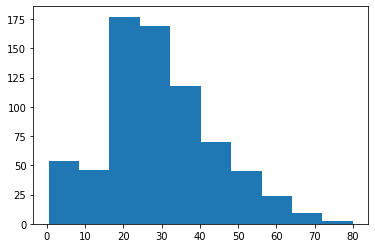

In [11]:
plt.hist(train['Age'])

In [12]:
train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [13]:
sum(train['Survived'].isnull())

0

In [14]:
sum(train['Age'].isnull())

177

In [15]:
train = train.dropna()

In [16]:
sum(train['Age'].isnull())

0

In [17]:
x_train = train[['Age']]
y_train = train[['Survived']]

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
sum(test['Age'].isna())

86

In [22]:
test = test.dropna()

In [23]:
sum(test['Age'].isna())

0

In [24]:
x_test = test[['Age']]

In [25]:
y_pred = dtc.predict(x_test)

In [26]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [29]:
output = pd.DataFrame({'': test['Age'], 'Survived': y_pred})

In [30]:
output.to_csv('my_submission.csv', index=False)